In [3]:
#https://habr.com/ru/post/464823/
    
import requests
import pandas as pd

number_of_pages = 200
#number_of_ads = number_of_pages * per_page

job_title = ["Python developer"]

#https://hh.ru/article/309400

for job in job_title:
    data=[]
    for i in range(number_of_pages):
        print(i)
        url = 'https://api.hh.ru/vacancies'
        par = {'text': job, 'area':'1','per_page':'10', 'page':i}
        r = requests.get(url, params=par)
        e=r.json()
        data.append(e)
        vacancy_details = data[0]['items'][0].keys()
        df = pd.DataFrame(columns= list(vacancy_details))
        ind = 0
        for i in range(len(data)):
            for j in range(len(data[i]['items'])):
                df.loc[ind] = data[i]['items'][j]
                ind+=1
    csv_name = job+".csv"
    df.to_csv(csv_name)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [4]:
df = pd.read_csv("Python developer.csv")
df.head()

,Unnamed: 0,id,premium,name,department,has_test,response_letter_required,area,salary,type,...,alternate_url,relations,employer,snippet,contacts,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary
0,0,49041173,True,Разработчик Python,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 187000, 'to': 338000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/vacancy/49041173,[],"{'id': '5544696', 'name': 'Брусова Татьяна Ана...",{'requirement': 'Опыт <highlighttext>разработк...,NaN,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],True
1,1,47682360,False,Python разработчик,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 380000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/vacancy/47682360,[],"{'id': '2324020', 'name': 'Точка', 'url': 'htt...","{'requirement': '...тема машинного обучения, b...",NaN,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False
2,2,47914759,False,Junior Data Engineer (Python),NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 120000, 'to': 120000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/vacancy/47914759,[],"{'id': '3319598', 'name': 'DataFork', 'url': '...",{'requirement': 'Опыт <highlighttext>разработк...,NaN,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],True
3,3,48768385,False,Junior разработчик Python Django,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 40000, 'to': 80000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/vacancy/48768385,[],"{'id': '1805574', 'name': 'Инсейлс Рус', 'url'...",{'requirement': 'Знание теории алгоритмов и ст...,NaN,"{'id': 'flexible', 'name': 'Гибкий график'}",[],[],[],False
4,4,48663627,False,Python Backend Developer Blockchain,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 250000, 'to': 450000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/vacancy/48663627,[],"{'id': '5420312', 'name': 'Валовой Сергей Алек...",{'requirement': 'Отличное знание <highlighttex...,NaN,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],True


In [5]:
import ast # run code from string for example ast.literal_eval("1+1") 

salaries = df.salary.dropna() # remove all NA's from dataframe
currencies = [ast.literal_eval(salaries.iloc[i])['currency'] for i in range(len(salaries))]
curr = set(currencies) #{'EUR', 'RUR', 'USD'}

#divide dataframe salararies by currency
rur = [ast.literal_eval(salaries.iloc[i]) for i in range(len(salaries)) if ast.literal_eval(salaries.iloc[i])['currency']=='RUR']
eur = [ast.literal_eval(salaries.iloc[i]) for i in range(len(salaries)) if ast.literal_eval(salaries.iloc[i])['currency']=='EUR']
usd = [ast.literal_eval(salaries.iloc[i]) for i in range(len(salaries)) if ast.literal_eval(salaries.iloc[i])['currency']=='USD']

In [6]:
fr = [x['from'] for x in rur] # lower range of salary
fr = list(filter(lambda x: x is not None, fr)) # remove NA's from lower range [0, 100, 200,...]

to = [x['to'] for x in rur] #upper range of salary
to = list(filter(lambda x: x is not None, to)) #remove NA's from upper range [100, 200, 300,...]

import numpy as np
salary_range = list(zip(fr, to)) # concatenate upper and lower range  [(0,100), (100, 200), (200, 300)...]
av = map(np.mean, salary_range) # convert [(0,100), (100, 200), (200, 300)...] to [50, 150, 250,...]
av = round(np.mean(list(av)),1) # average value from [50, 150, 250,...]

print("average salary as Python developer ", av, "rubles")

average salary as Python developer  191235.7 rubles


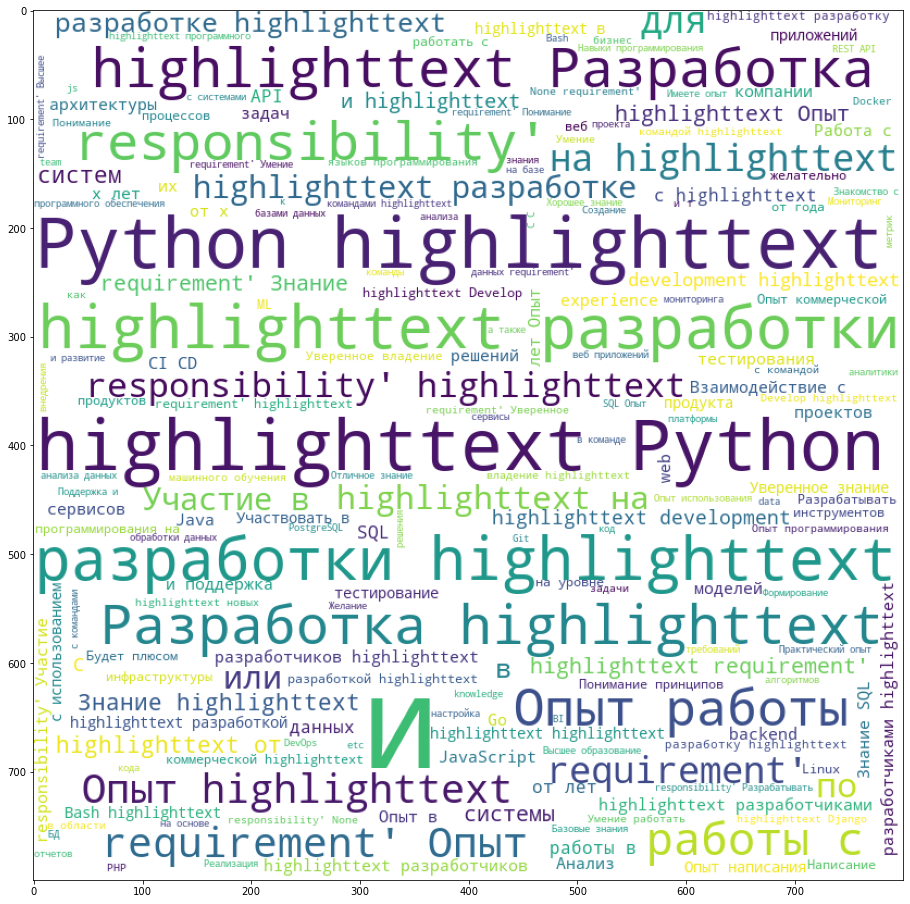

In [8]:
from collections import Counter

vacancy_names = df.name # change here to change source of data/words etc
cloud = Counter(vacancy_names)
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
cloud = ''
for x in list(vacancy_names):
    cloud+=x+' '
wordcloud = WordCloud(width = 800, height = 800,
                stopwords = stopwords, 
                min_font_size = 8,background_color='white'
                     ).generate(cloud)

import matplotlib.pylab as plt
plt.figure(figsize = (16, 16)) 
plt.imshow(wordcloud)
plt.savefig('Python_developer_vacancy_cloud.png')